In [19]:
from google.colab import files
uploaded = files.upload()

Saving state_wise_population__2019.csv to state_wise_population__2019 (1).csv


In [20]:
# 1. LOAD DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("state_wise_population__2019.csv")
df.head()


,S.No,State,total_population,population_male,population_female
0,1,MAHARASHTRA,37722136,19961736,17760400
1,2,UTTAR PRADESH,25302925,13433369,11869556
2,3,ANDHRA PRADESH,18171615,9192368,8979247
3,4,WEST BENGAL,18063509,9357777,8705732
4,5,GUJARAT,17835049,9541688,8293361


In [8]:
# 2. Shape & Dtypes
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)


Shape: (33, 5)

Dtypes:
 S.No                  int64
State                object
total_population      int64
population_male       int64
population_female     int64
dtype: object


In [10]:
# 3. Missing values
df.isna().sum()


,0
S.No,0
State,0
total_population,0
population_male,0
population_female,0


In [11]:
# 4. Duplicate Rows
df.duplicated().sum()


np.int64(0)

In [12]:
# 5. Outlier Detection (IQR method)
num_cols = ["total_population", "population_male", "population_female"]

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

,0
total_population,2
population_male,2
population_female,2


In [21]:
# 6. Descriptive Statistics
df.describe()

,S.No,total_population,population_male,population_female
count,33.00000,3.300000e+01,3.300000e+01,3.300000e+01
mean,17.00000,7.818340e+06,4.067121e+06,3.751219e+06
std,9.66954,1.010993e+07,5.253040e+06,4.862032e+06
min,1.00000,1.303900e+04,8.193000e+03,4.846000e+03
25%,9.00000,5.418010e+05,2.663590e+05,2.754420e+05
50%,17.00000,3.003234e+06,1.560423e+06,1.442811e+06
75%,25.00000,1.348200e+07,6.957261e+06,6.280675e+06
max,33.00000,3.772214e+07,1.996174e+07,1.776040e+07


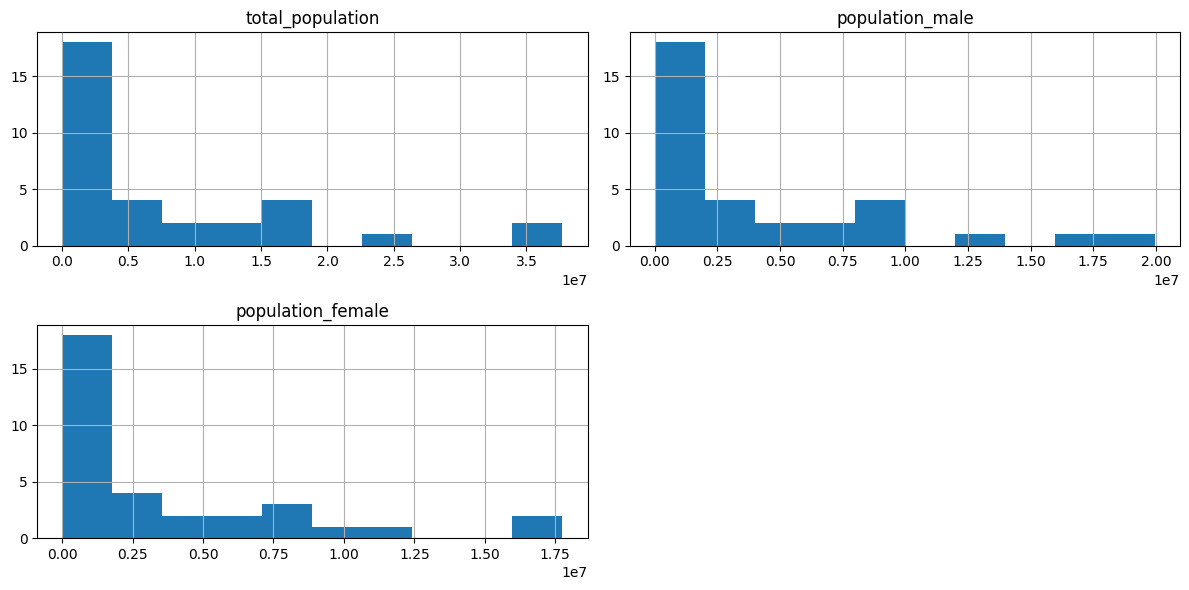

In [14]:
# 7. Histograms
df[num_cols].hist(figsize=(12,6))
plt.tight_layout()
plt.show()

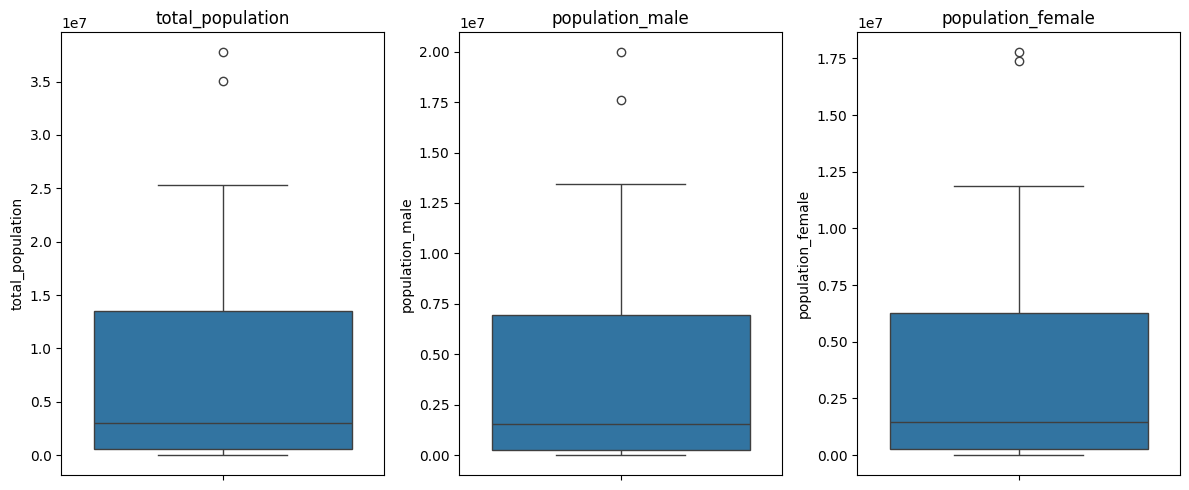

In [15]:
# 8. Boxplots (for outliers)
plt.figure(figsize=(12,5))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

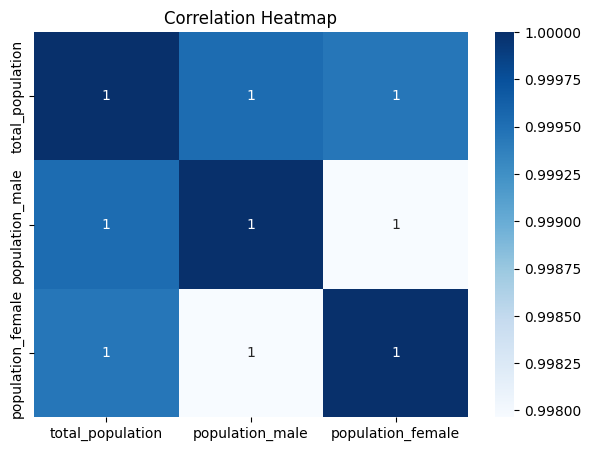

In [16]:
# 9. Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# 10. Group Analysis
df.sort_values("total_population", ascending=False).head()

,S.No,State,total_population,population_male,population_female
0,1,MAHARASHTRA,37722136,19961736,17760400
31,32,TELANGANA,35003674,17611633,17392041
1,2,UTTAR PRADESH,25302925,13433369,11869556
2,3,ANDHRA PRADESH,18171615,9192368,8979247
3,4,WEST BENGAL,18063509,9357777,8705732


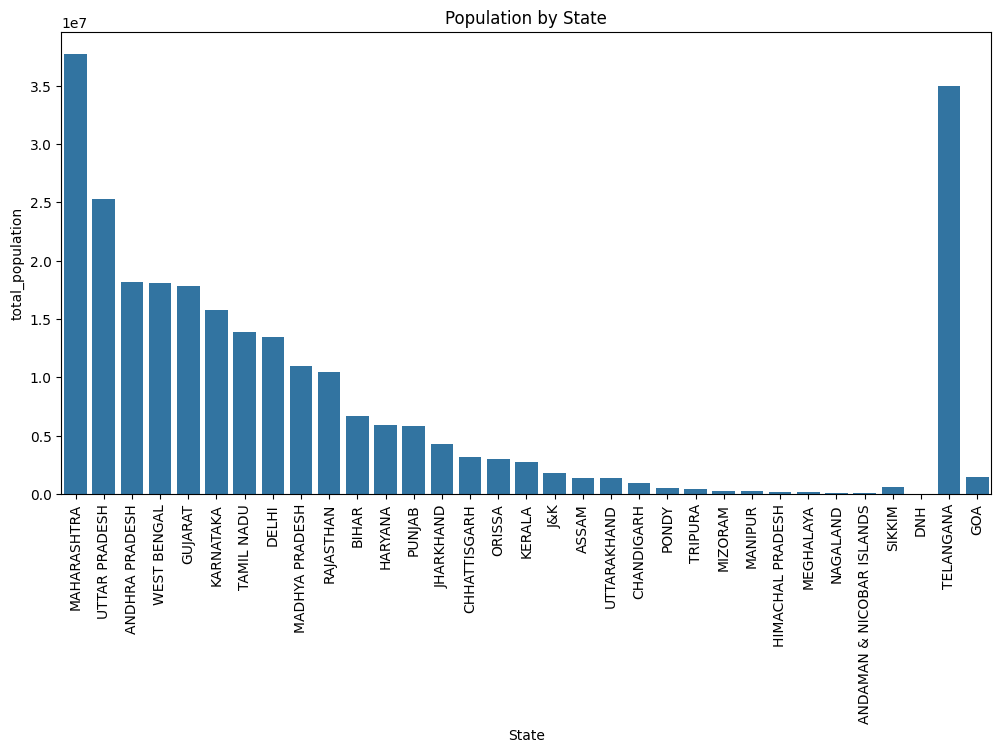

In [18]:
# 12. Category-wise Distribution (State-wise)
plt.figure(figsize=(12,6))
sns.barplot(x="State", y="total_population", data=df)
plt.xticks(rotation=90)
plt.title("Population by State")
plt.show()

In [28]:
# 13. Trend Detection
df["sex_ratio"] = df["population_female"] / df["population_male"]

df.sort_values("sex_ratio", ascending=False).head()


,S.No,State,total_population,population_male,population_female,sex_ratio,gender_ratio
16,17,KERALA,2755973,1335615,1420358,1.063449,1.063449
24,25,MANIPUR,264986,128931,136055,1.055254,1.055254
26,27,MEGHALAYA,143007,70028,72979,1.042140,1.042140
21,22,PONDY,541801,266359,275442,1.034101,1.034101
23,24,MIZORAM,291822,143803,148019,1.029318,1.029318


In [29]:
# 14. Anomaly Spotting
df[(df["population_male"] > df["total_population"]) |
   (df["population_female"] > df["total_population"])]

,S.No,State,total_population,population_male,population_female,sex_ratio,gender_ratio


In [30]:
# 15. Business Questions
# 1. Which state has highest population?
df.loc[df["total_population"].idxmax()]

# 2. Which state has lowest?
df.loc[df["total_population"].idxmin()]

# 3. Gap between male & female?
df["gender_gap"] = df["population_male"] - df["population_female"]
df.sort_values("gender_gap", ascending=False).head()


,S.No,State,total_population,population_male,population_female,sex_ratio,gender_ratio,gender_gap
0,1,MAHARASHTRA,37722136,19961736,17760400,0.889722,0.889722,2201336
1,2,UTTAR PRADESH,25302925,13433369,11869556,0.883587,0.883587,1563813
4,5,GUJARAT,17835049,9541688,8293361,0.869171,0.869171,1248327
7,8,DELHI,13481997,7201322,6280675,0.872156,0.872156,920647
3,4,WEST BENGAL,18063509,9357777,8705732,0.930321,0.930321,652045


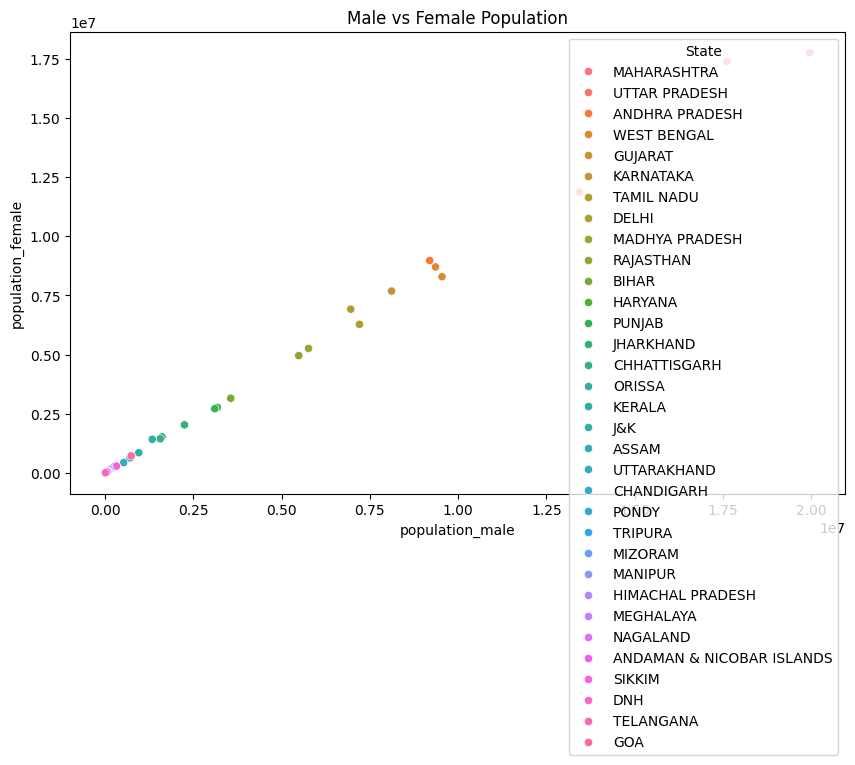

In [39]:
# 16. Visual Storytelling
plt.figure(figsize=(10,6))
sns.scatterplot(x="population_male", y="population_female", hue="State", data=df)
plt.title("Male vs Female Population")
plt.show()

In [32]:
# 17. Summary Report (Text Output)
report = {
    "Total States": df.shape[0],
    "Total Population (Sum)": df["total_population"].sum(),
    "Average State Population": df["total_population"].mean(),
    "State with Max Population": df.loc[df["total_population"].idxmax(), "State"],
    "State with Min Population": df.loc[df["total_population"].idxmin(), "State"],
}
report


{'Total States': 33,
 'Total Population (Sum)': np.int64(258005235),
 'Average State Population': np.float64(7818340.454545454),
 'State with Max Population': 'MAHARASHTRA',
 'State with Min Population': 'DNH'}

In [33]:
# 18. Insights (Auto-generated)
print("KEY INSIGHTS:\n")

print("1. The highest population state is:", df.loc[df["total_population"].idxmax(), "State"])
print("2. The lowest population state is:", df.loc[df["total_population"].idxmin(), "State"])
print("3. Average gender ratio (F/M):", round(df["sex_ratio"].mean(), 2))
print("4. Highest gender gap:", df.loc[df["gender_gap"].idxmax(), "State"])
print("5. Correlation (Male vs Female):", df["population_male"].corr(df["population_female"]))


KEY INSIGHTS:

1. The highest population state is: MAHARASHTRA
2. The lowest population state is: DNH
3. Average gender ratio (F/M): 0.92
4. Highest gender gap: MAHARASHTRA
5. Correlation (Male vs Female): 0.9979642207883787


In [34]:
# 19. Recommendations
print("RECOMMENDATIONS:\n")
print("1. States with high gender imbalance should receive targeted social welfare policies.")
print("2. Resource allocation (health, education) can be decided based on population rankings.")
print("3. Correlation between male & female populations suggests proportional growth across states.")
print("4. States with low population may require increased funding or migration incentives.")


RECOMMENDATIONS:

1. States with high gender imbalance should receive targeted social welfare policies.
2. Resource allocation (health, education) can be decided based on population rankings.
3. Correlation between male & female populations suggests proportional growth across states.
4. States with low population may require increased funding or migration incentives.


In [38]:
# 20. Export Cleaned Data
df.to_csv("cleaned_population_2019.csv", index=False)
print("Cleaned dataset exported successfully!")
files.download("cleaned_population_2019.csv")
print("Cleaned dataset downloaded successfully!")

Cleaned dataset exported successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset downloaded successfully!
